In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from tools import *
import geopandas as gpd
import warnings
import matplotlib.gridspec as gridspec
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.cm as cm
import matplotlib.patches as mpatches
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',None)

# 1 Global Analysis 
## 1. Creation of a global dataframe

In [2]:
hotel_rooms = generate_global_df()
display(hotel_rooms.shape)
hotel_rooms.head()

(155019, 91)

,Name,City,Country,Region,Continent,Location,Rating,Score,NbReviews,Distance from center,Stars,Staff_rating,Facilities_rating,Cleanliness_rating,Comfort_rating,Value_for_money_rating,Location_rating,Room Type,Guests nb,Price,Breakfast,Cancellation,Region Number,Continent Number,Price per Square Meter to Buy Apartment Outside of Centre,Price per Square Meter to Buy Apartment in City Centre,"International Primary School, Yearly for 1 Child","Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child",1 Pair of Jeans (Levis 501 Or Similar),1 Pair of Men Leather Business Shoes,1 Pair of Nike Running Shoes (Mid-Range),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",Apples (1kg),Banana (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Bottle of Wine (Mid-Range),Chicken Fillets (1kg),Cigarettes 20 Pack (Marlboro),Domestic Beer (0.5 liter bottle),Eggs (regular) (12),Imported Beer (0.33 liter bottle)_x,Lettuce (1 head),Loaf of Fresh White Bread (500g),Local Cheese (1kg),"Milk (regular), (1 liter)",Onion (1kg),Oranges (1kg),Potato (1kg),"Rice (white), (1kg)",Tomato (1kg),Water (1.5 liter bottle),Apartment (1 bedroom) Outside of Centre,Apartment (1 bedroom) in City Centre,Apartment (3 bedrooms) Outside of Centre,Apartment (3 bedrooms) in City Centre,Cappuccino (regular),Coke/Pepsi (0.33 liter bottle),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle)_y,McMeal at McDonalds (or Equivalent Combo Meal),"Meal for 2 People, Mid-range Restaurant, Three-course","Meal, Inexpensive Restaurant",Water (0.33 liter bottle),Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate","Cinema, International Release, 1 Seat","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),Gasoline (1 liter),Monthly Pass (Regular Price),One-way Ticket (Local Transport),Taxi 1hour Waiting (Normal Tariff),Taxi 1km (Normal Tariff),Taxi Start (Normal Tariff),Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car),Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car),"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment","Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)",Mobile Phone Monthly Plan with Calls and 10GB+ Data,Population,Yearly Change,net_change,density,land_area,migrants,fert_rate,med_age,urban_pop,world_share,Tourism,Tourism_year
0,AC Hotel by Marriott San Juan Condado,San Juan,Puerto Rico,Caribbean,America,"Condado, San Juan",Very Good,8.2,"1,398",5.3,4,8.7,8.5,8.7,8.7,7.8,8.9,King Executive Room with Balcony,2,342.0,23.0,1.0,29,19,NaN,NaN,10508.4,442.32,44.57,101.06,80.81,42.22,5.28,2.26,12.57,16.89,8.19,9.92,2.05,5.18,2.6,2.34,3.34,7.93,1.97,2.68,NaN,4.01,2.43,4.4,1.73,822.85,1767.04,1497.59,2562.14,3.3,1.84,3.28,4.69,8.55,75.06,18.77,1.56,2053.2,4.7,8.91,43.78,NaN,0.96,NaN,NaN,NaN,NaN,NaN,23674.39,NaN,297.47,65.25,72.97,"3,260,314",0.24 %,"7,907",368,"8,870","19,835",1.3,44.0,N.A.,0.04 %,3882000,2020
1,AC Hotel by Marriott San Juan Condado,San Juan,Puerto Rico,Caribbean,America,"Condado, San Juan",Very Good,8.2,"1,398",5.3,4,8.7,8.5,8.7,8.7,7.8,8.9,King Executive Room with Balcony,2,379.0,0.0,1.0,29,19,NaN,NaN,10508.4,442.32,44.57,101.06,80.81,42.22,5.28,2.26,12.57,16.89,8.19,9.92,2.05,5.18,2.6,2.34,3.34,7.93,1.97,2.68,NaN,4.01,2.43,4.4,1.73,822.85,1767.04,1497.59,2562.14,3.3,1.84,3.28,4.69,8.55,75.06,18.77,1.56,2053.2,4.7,8.91,43.78,NaN,0.96,NaN,NaN,NaN,NaN,NaN,23674.39,NaN,297.47,65.25,72.97,"3,260,314",0.24 %,"7,907",368,"8,870","19,835",1.3,44.0,N.A.,0.04 %,3882000,2020
2,AC Hotel by Marriott San Juan Condado,San Juan,Puerto Rico,Caribbean,America,"Condado, San Juan",Very Good,8.2,"1,398",5.3,4,8.7,8.5,8.7,8.7,7.8,8.9,King Executive Room with Balcony,3,368.0,23.0,1.0,29,19,NaN,NaN,10508.4,442.32,44.57,101.06,80.81,42.22,5.28,2.26,12.57,16.89,8.19,9.92,2.05,5.18,2.6,2.34,3.34,7.93,1.97,2.68,NaN,4.01,2.43,4.4,1.73,822.85,1767.04,1497.59,2562.14,3.3,1.84,3.28,4.69,8.55,75.06,18.77,1.56,2053.2,4.7,8.91

In [3]:
hotels = hotel_rooms.groupby(['Name','Location'])
display(hotels.shape)
hotels.describe()

AttributeError: 'DataFrameGroupBy' object has no attribute 'shape'

In [4]:
countries = generate_global_df(columns_country)
display(countries.shape)
countries.describe()

(60, 15)

,Population,Yearly Change,net_change,land_area,migrants,fert_rate,med_age,urban_pop,world_share,Tourism,Tourism_year
count,6.000000e+01,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000
mean,8.736966e+07,0.254500,3.481311e+05,1.314996e+06,-2.488350e+03,1.703333,37.866667,71.800000,1.086000,1.254249e+07,2019.766667
std,2.563126e+08,1.275908,1.580892e+06,2.935350e+06,2.853447e+05,0.469391,6.608845,17.231032,3.186117,2.061690e+07,0.426522
min,1.322765e+06,-7.450000,-2.957105e+06,7.000000e+02,-9.104750e+05,0.900000,20.000000,19.000000,0.020000,1.180000e+05,2019.000000
25%,6.519468e+06,-0.090000,-1.252150e+04,7.902925e+04,-2.249875e+04,1.400000,32.750000,59.750000,0.077500,2.015500e+06,2020.000000
50%,2.089320e+07,0.375000,4.699750e+04,2.990150e+05,0.000000e+00,1.600000,40.000000,75.000000,0.260000,4.653000e+06,2020.000000
75%,5.925670e+07,0.762500,2.621650e+05,7.500565e+05,2.849800e+04,1.800000,43.000000,85.000000,0.735000,1.259325e+07,2020.000000
max,1.428628e+09,2.930000,1.145449e+07,1.637687e+07,1.784718e+06,3.200000,49.000000,100.000000,17.760000,1.171090e+08,2020.000000


Showing the none/null values and removing them.

In [5]:
print("Hotels that are duplicated: ",hotels.duplicated().sum())
print("Hotels that contains null: ",hotels.isnull().sum().sum())

Hotels that are duplicated:  0
Hotels that contains null:  0


In [4]:
print("Hotels that are duplicated: ",hotel_rooms.duplicated().sum())
print("Hotels that contains null: ",hotel_rooms.isnull().sum().sum())

Hotels that are duplicated:  0
Hotels that contains null:  526


## 2. Distribution visualizations

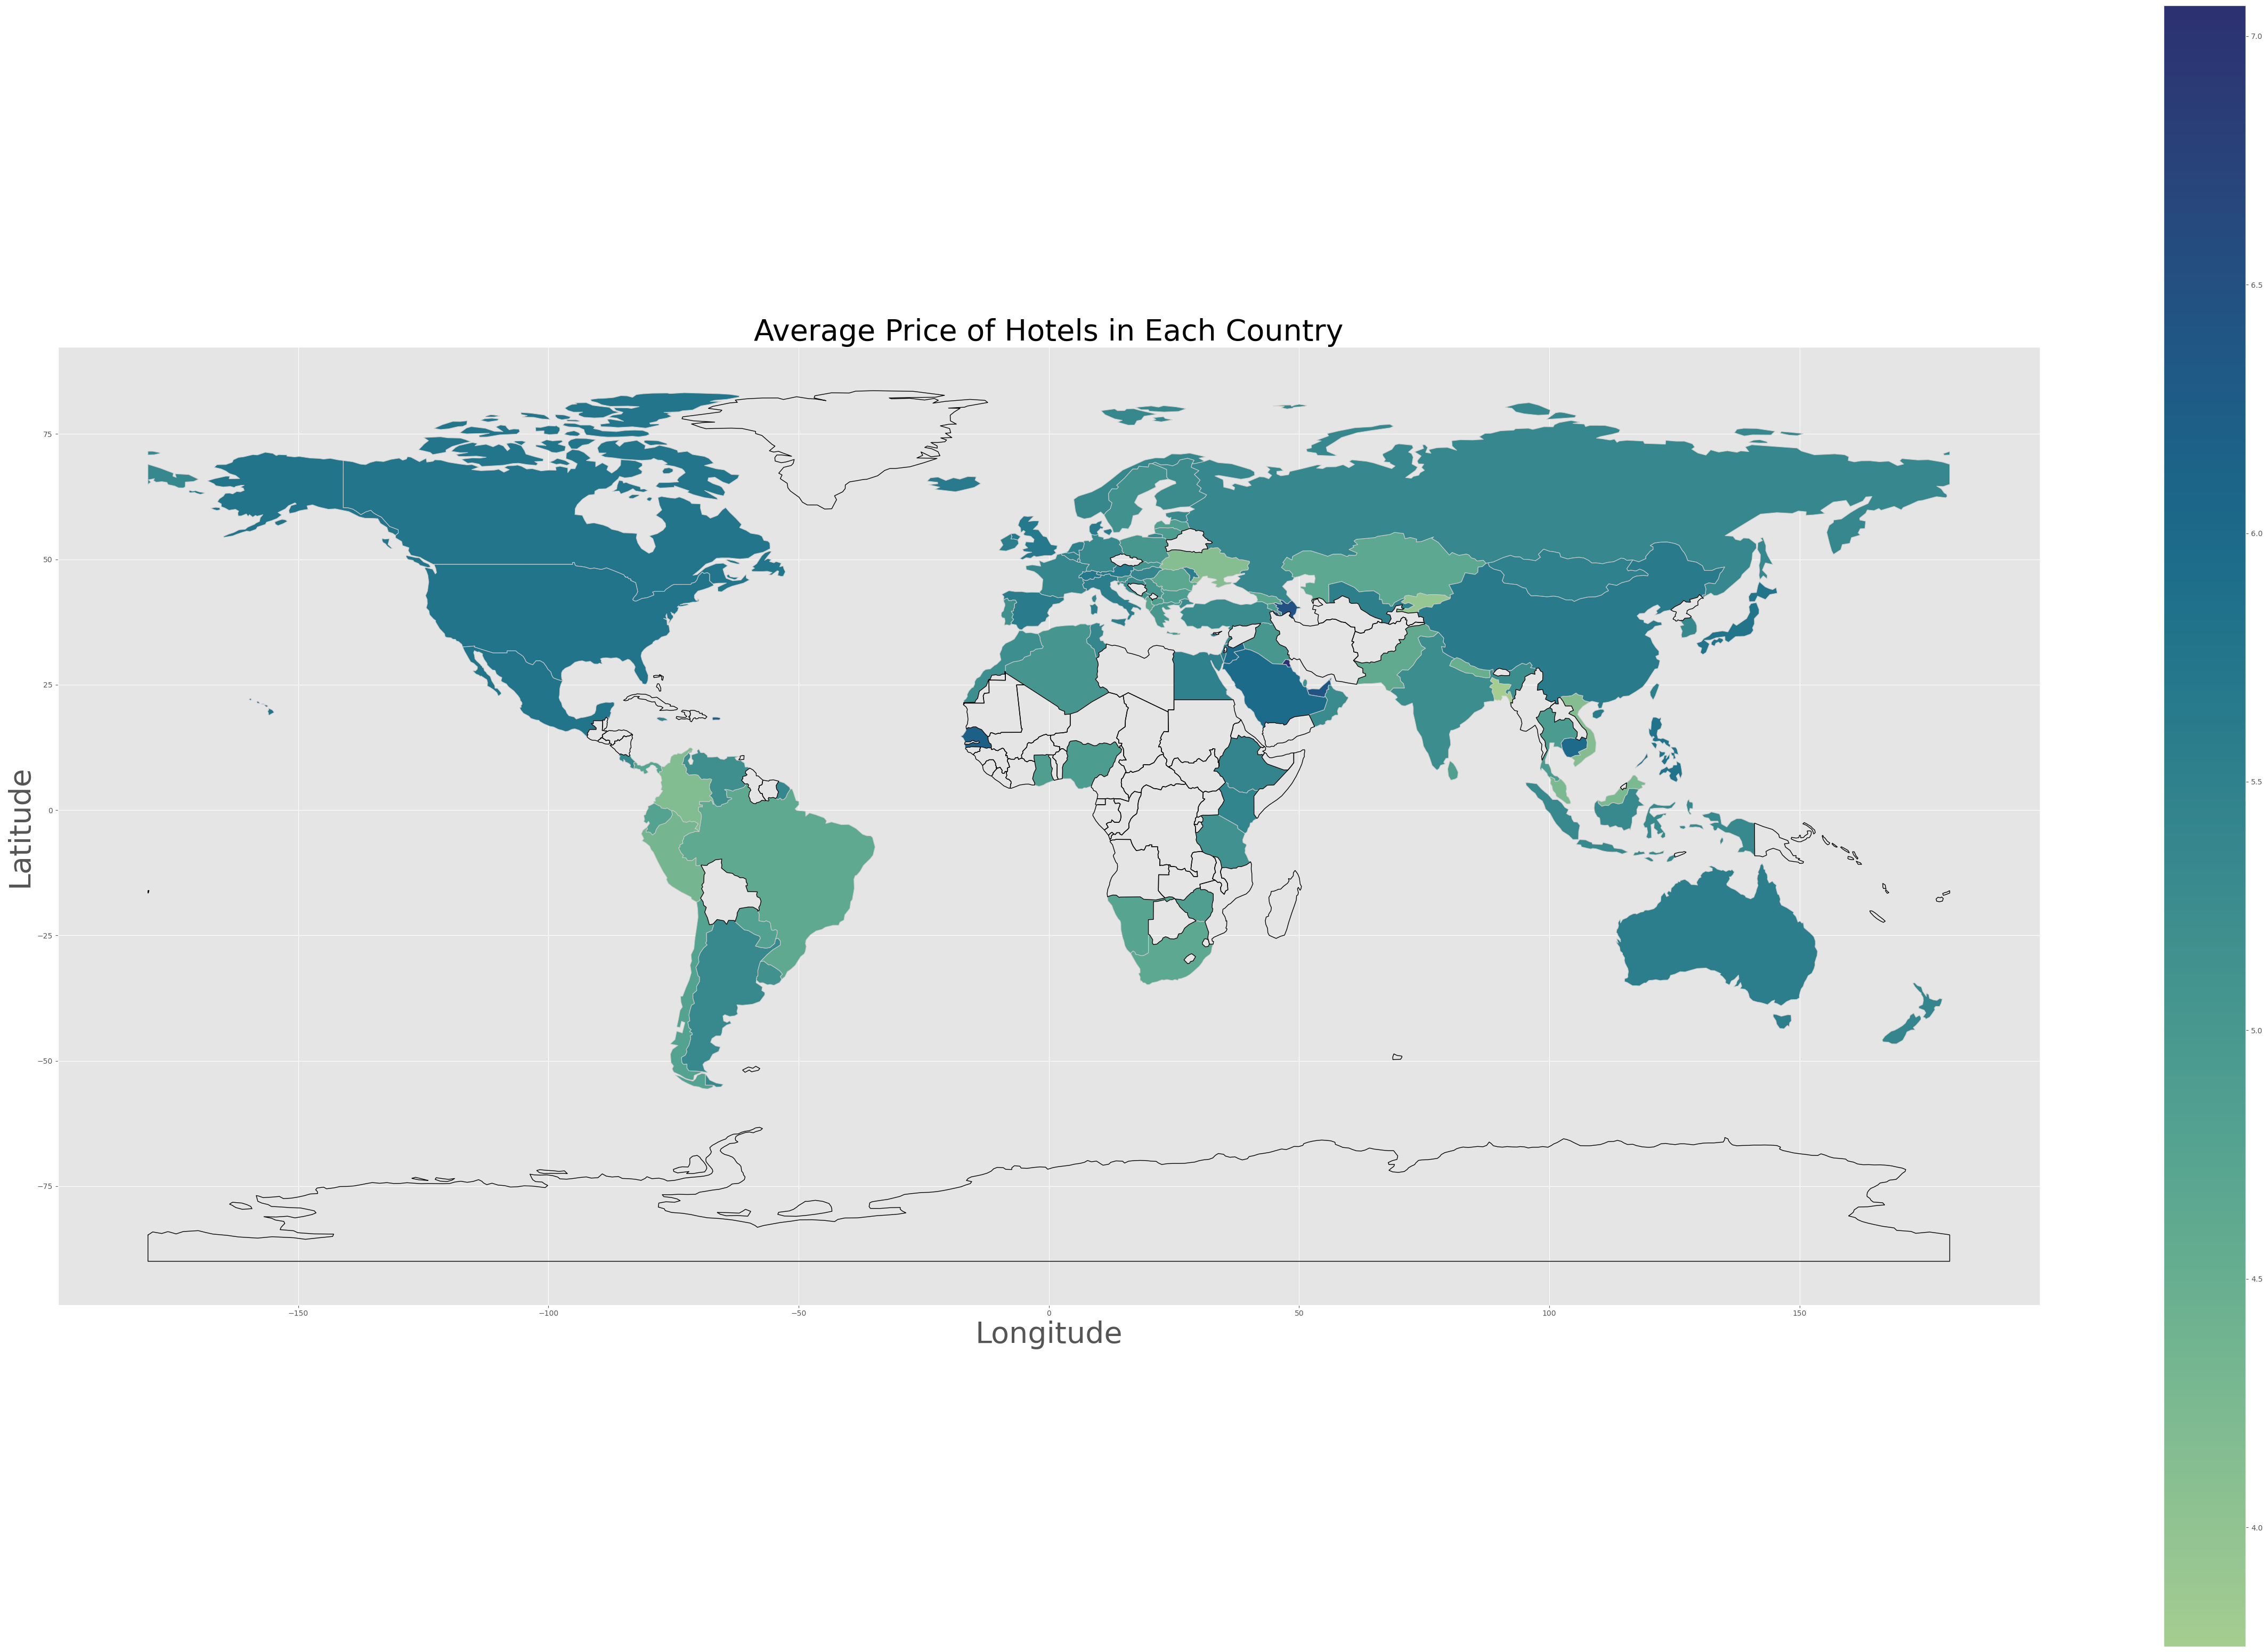

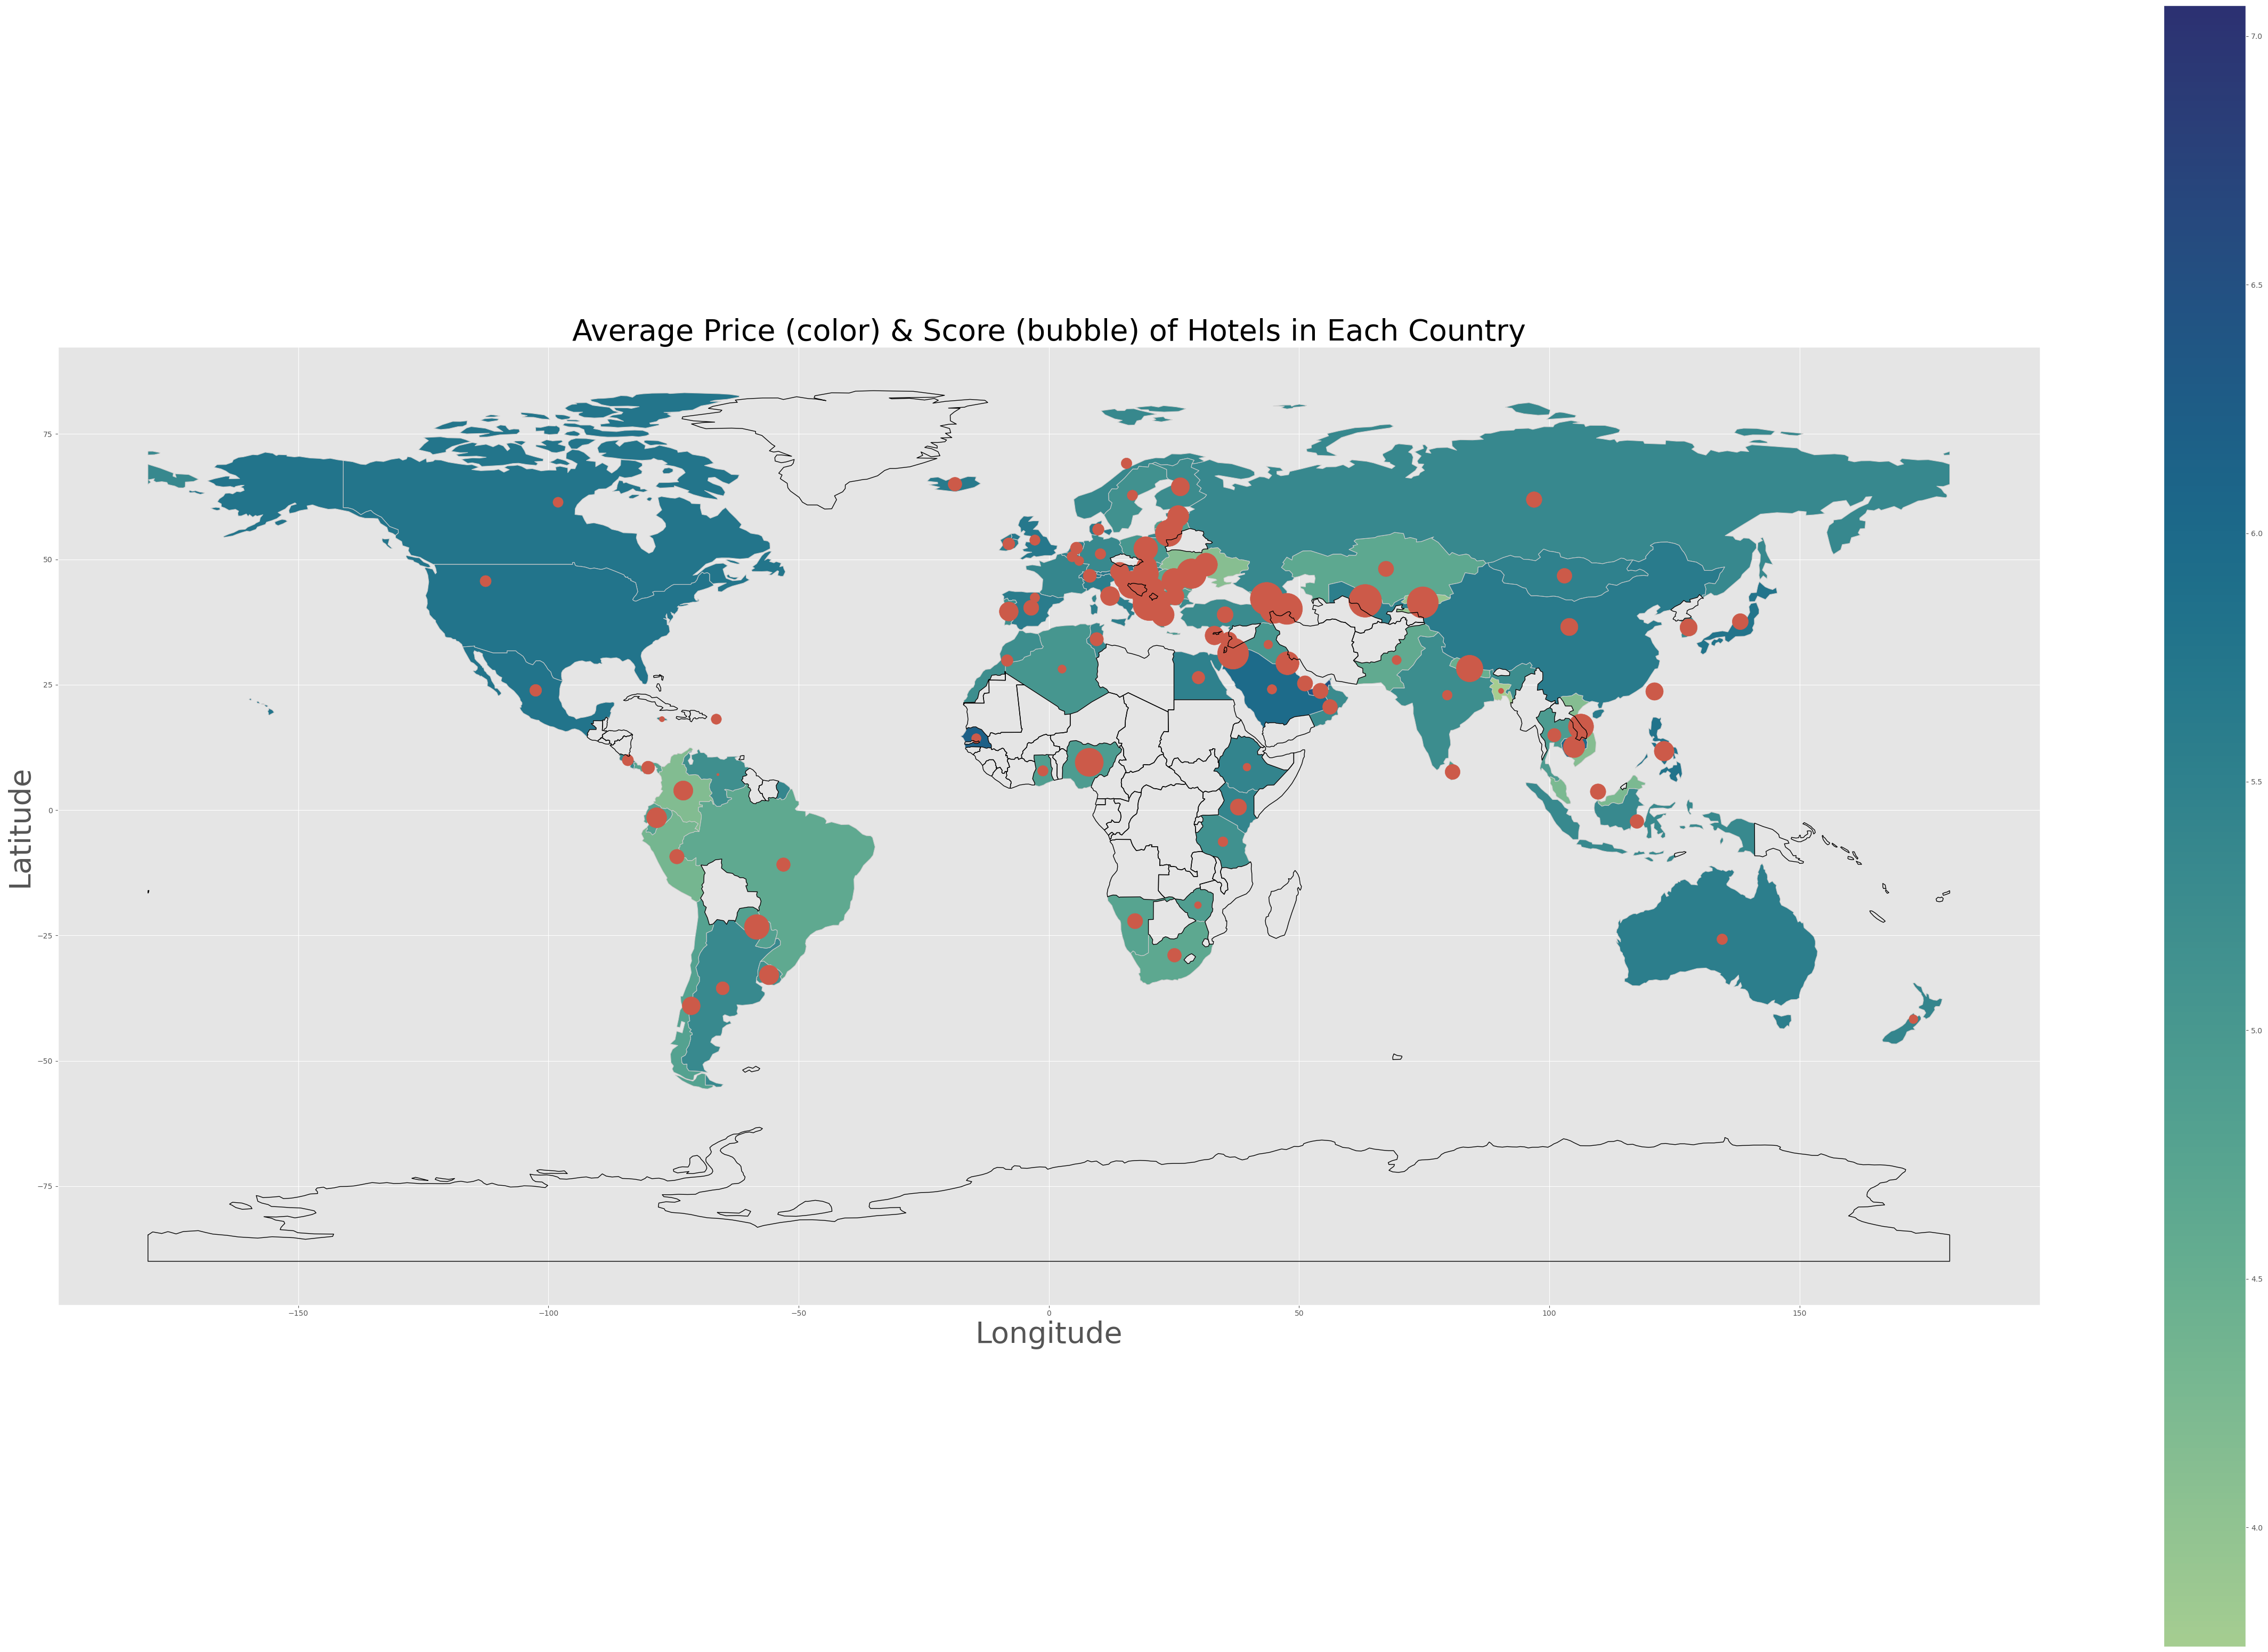

4 commun countries of the k=15 with the highest score and the k=15 with the lower price


{'Albania', 'Georgia', 'Kyrgyzstan', 'Nepal'}

2 commun countries of the k=15 with the highest score and the k=15 with the higher price


{'Azerbaijan', 'Jordan'}

In [3]:
df = pd.DataFrame()
df = (hotel_rooms.groupby('Country')[['Price']].mean().reset_index())
df['Price'] = np.log(df['Price'])
plot_country_bubbles(df, v_name_color='Price') 

df = (hotel_rooms.groupby('Country')[[ 'Score','Price']].mean().reset_index())
df['Price'] = np.log(df['Price'])
df['Score'] = np.power(df['Score'], 20)
scale_factor = 2000 / (df['Score'].max()-df['Score'].min())
df['Score']=df['Score']*scale_factor
plot_country_bubbles(df) 

k=15
top_score_countries = df.sort_values('Score', ascending=False)['Country'].head(k)
top_price_countries = df.sort_values('Price', ascending=True)['Country'].head(k)
top_price_countries_desc = df.sort_values('Price', ascending=False)['Country'].head(k)
common_countries = set(top_score_countries).intersection(set(top_price_countries))
common_countries_desc = set(top_score_countries).intersection(set(top_price_countries_desc))
print(f"{len(common_countries)} commun countries of the k={k} with the highest score and the k={k} with the lower price")
display((common_countries))
print(f"{len(common_countries_desc)} commun countries of the k={k} with the highest score and the k={k} with the higher price")
display((common_countries_desc))


## generalisation on all k values

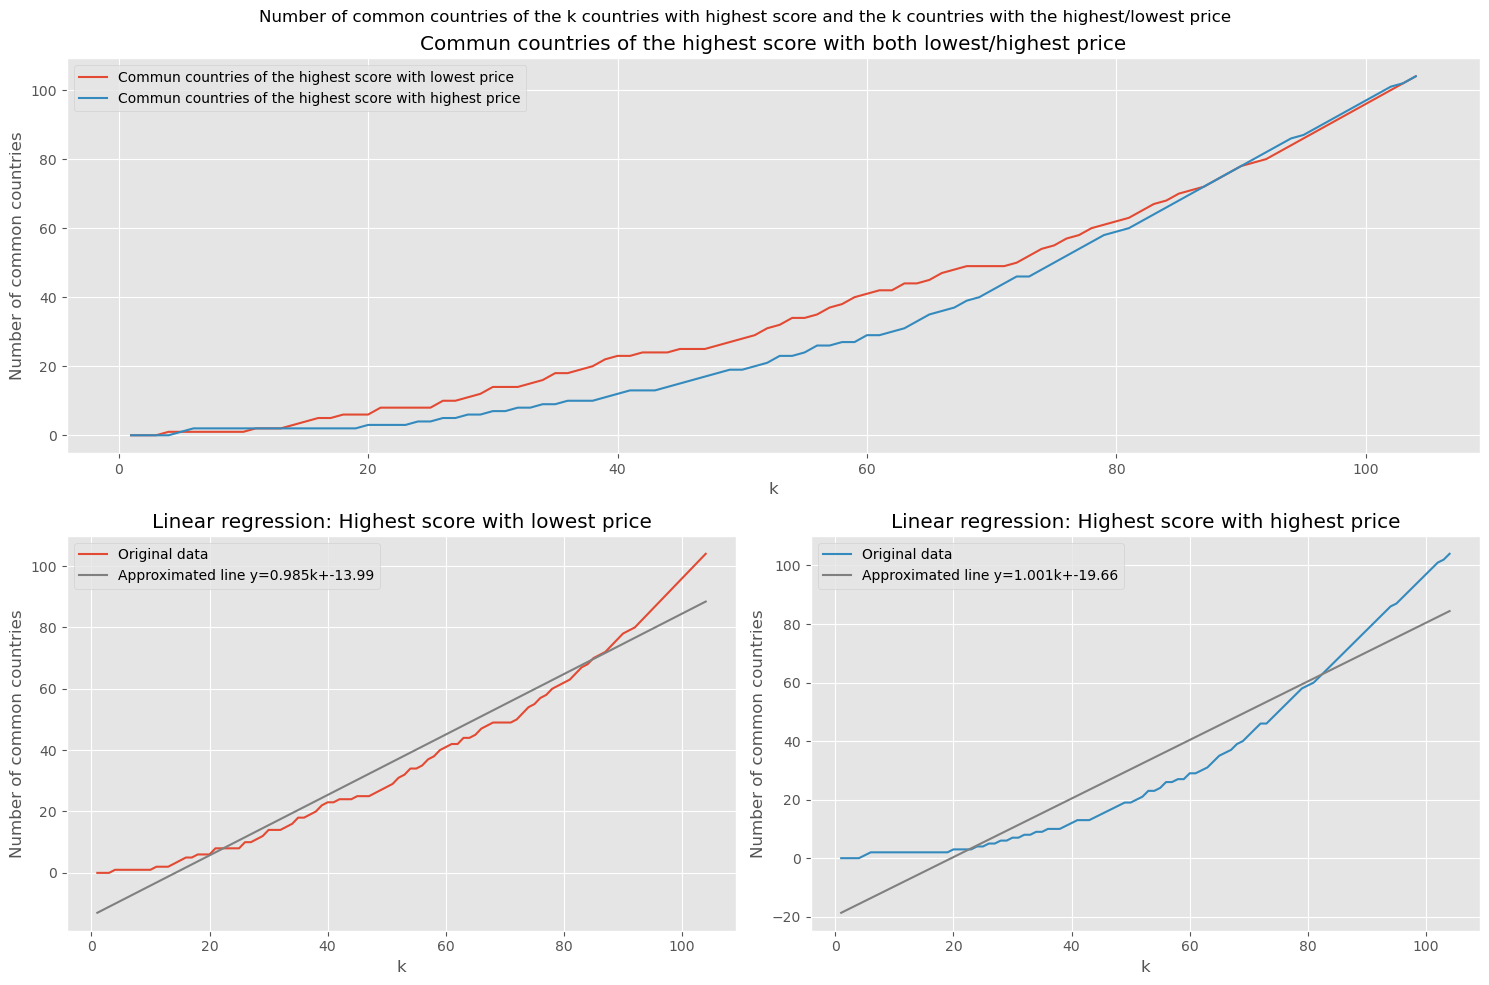

In [4]:
df = (hotel_rooms.groupby('Country')[[ 'Score','Price']].mean().reset_index())
df['Price'] = np.log(df['Price'])
df['Score'] = np.power(df['Score'], 20)
scale_factor = 2000 / (df['Score'].max()-df['Score'].min())
df['Score']=df['Score']*scale_factor
num_countries = len(df['Country'].unique())
x = np.array(range(1, num_countries + 1))

common_lengths = []
common_lengths_desc = []

# Loop over all possible k values for ascending=True and ascending=False
for k in range(1, num_countries + 1):
    top_score_countries = df.sort_values('Score', ascending=False)['Country'].head(k)
    top_price_countries_asc = df.sort_values('Price', ascending=True)['Country'].head(k)
    top_price_countries_desc = df.sort_values('Price', ascending=False)['Country'].head(k)
    common_countries_asc = set(top_score_countries).intersection(set(top_price_countries_asc))
    common_countries_desc = set(top_score_countries).intersection(set(top_price_countries_desc))
    common_lengths.append(len(common_countries_asc))
    common_lengths_desc.append(len(common_countries_desc))

# Calculate the slope and intercept of the best fit line for ascending=True
y = np.array(common_lengths)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
best_fit = slope * x + intercept

# Calculate the slope and intercept of the best fit line for ascending=False
y_desc = np.array(common_lengths_desc)
slope_desc, intercept_desc, r_value_desc, p_value_desc, std_err_desc = stats.linregress(x, y_desc)
best_fit_desc = slope_desc * x + intercept_desc

plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 2)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax1 = plt.subplot(gs[0, :])
ax1.plot(x, y, label='Commun countries of the highest score with lowest price')
ax1.plot(x, y_desc, label='Commun countries of the highest score with highest price')
ax1.set_title('Commun countries of the highest score with both lowest/highest price')
ax1.legend()

ax2 = plt.subplot(gs[1, 0])
ax2.plot(x, y, label='Original data', color=colors[0])
ax2.plot(x, best_fit, 'grey', label='Approximated line y={:.3f}k+{:.2f}'.format(slope, intercept))
ax2.set_title('Linear regression: Highest score with lowest price') #ascending=True
ax2.legend()

ax3 = plt.subplot(gs[1, 1])
ax3.plot(x, y_desc, label='Original data', color=colors[1])
ax3.plot(x, best_fit_desc, 'grey', label='Approximated line y={:.3f}k+{:.2f}'.format(slope_desc, intercept_desc))
ax3.set_title('Linear regression: Highest score with highest price') #ascending=False
ax3.legend()

for ax in [ax1, ax2, ax3]:
    ax.set(xlabel='k', ylabel='Number of common countries')

plt.suptitle('Number of common countries of the k countries with highest score and the k countries with the highest/lowest price')
plt.tight_layout()
plt.show()

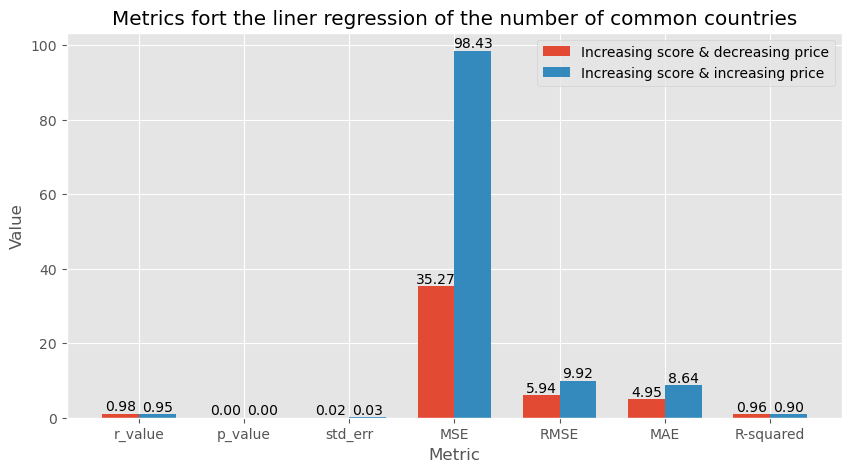

In [5]:
# Calculate the metrics for ascending=True (highest score and lowest price)
y_pred = slope * x + intercept
rss_asc = np.sum((y - y_pred) ** 2)
mse_asc = mean_squared_error(y, y_pred)
rmse_asc = np.sqrt(mse_asc)
mae_asc = mean_absolute_error(y, y_pred)
r_squared_asc = r2_score(y, y_pred)

# Calculate the metrics for ascending=False (highest score and highest price)
y_pred_desc = slope_desc * x + intercept_desc
rss_desc = np.sum((y_desc - y_pred_desc) ** 2)
mse_desc = mean_squared_error(y_desc, y_pred_desc)
rmse_desc = np.sqrt(mse_desc)
mae_desc = mean_absolute_error(y_desc, y_pred_desc)
r_squared_desc = r2_score(y_desc, y_pred_desc)

metrics_asc = [r_value, p_value, std_err, mse_asc, rmse_asc, mae_asc, r_squared_asc]
metrics_desc = [r_value_desc, p_value_desc, std_err_desc, mse_desc, rmse_desc, mae_desc, r_squared_desc]
metric_names = ['r_value', 'p_value', 'std_err', 'MSE', 'RMSE', 'MAE', 'R-squared']

# Normalize the metrics for ascending=True relative to ascending=False
metrics_asc_normalized = [asc / desc for asc, desc in zip(metrics_asc, metrics_desc)]

x_locs = np.arange(len(metric_names))
width = 0.35

plt.figure(figsize=(10, 5))

bars_asc = plt.bar(x_locs - width/2, metrics_asc, width, label='Increasing score & decreasing price') 
bars_desc = plt.bar(x_locs + width/2, metrics_desc, width, label='Increasing score & increasing price')

# Function to add value annotations on top of the bars
def add_values_on_bars(bars, metrics):
    for bar, metric in zip(bars, metrics):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.05,  
                 '{:.2f}'.format(metric), ha='center', va='bottom')

add_values_on_bars(bars_asc, metrics_asc)  # Display the original, non-normalized values
add_values_on_bars(bars_desc, metrics_desc)

plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Metrics fort the liner regression of the number of common countries')
plt.legend()
plt.xticks(x_locs, metric_names)
plt.show()